<h1 style="text-align: center;">黄金分割数</h1>

<p style="text-align: center;">2025-9-12</p>

课程代码均在如下 GitHub 仓库开源：<https://github.com/GHe0000/scientific-programming-intro>

## 目录
- [1.作业要求](#作业要求)
- [2.思路](#思路（问题背景）)
- [3.数值计算](#数值计算)
- [4.解析计算](#解析计算)
- [5.结论](#结论)
- [6.参考资料](#参考资料)
- [7.致谢](#致谢)
- [8.附一：问题](#附一：问题)
- [8.附二：学习心得](#附二：学习心得)

## 作业要求

从数值和解析两方面充分验证如下等式：

$$ \frac{1+\sqrt{5}}{2} = 1 + \frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\cdots}}}} \tag{1}$$

要求：

1. 补充简短的黄金分割数的历史;
2. 结构完整，排版简洁，描述充分;
3. 可视化的结果;

## 问题背景

黄金分割数，一个在数学、艺术和自然界中反复出现的无理数，其历史源远流长. 它通常用希腊字母 $\phi$ (Phi) 表示.

其精确值为：

$$\phi = \frac{1+\sqrt{5}}{2}$$

---

对黄金分割的认识最早可以追溯到古希腊，约公元前300年，古希腊数学家欧几里得《几何原本》(Elements) 中首次对这个比例进行了严谨的数学描述. 他称之为“中末比”(Extreme and Mean Ratio)，其定义为：将一条线段分为两部分，使得**全长与较长部分之比**等于**较长部分与较短部分之比**. 若设线段全长为 $a+b$，较长部分为 $a$，较短部分为 $b$，则其数学关系式为：

$$ \frac{a+b}{a} = \frac{a}{b} = \phi $$

在文艺复兴时期，卢卡·帕西奥利在其著作《神圣比例》(De Divina Proportione) 中称其为“神圣比例”，列奥纳多·达·芬奇为此书绘制插图，使黄金分割数在艺术与美学领域获得极大关注. 17 世纪德国天文学家约翰内斯·开普勒发现黄金分割数与斐波那契数列之间的深刻联系，即斐波那契数列($F(n)$)中后一项与前一项的比值会无限趋近于黄金分割数 $\phi$.

$$ \lim_{n \to \infty} \frac{F(n+1)}{F(n)} = \phi $$

并把“神圣比例”称为“黄金比”，“黄金比”的名称在 19 世纪逐渐流行.

## 思路

要计算连分数，我们同样可以将式(1)右侧的式子改写成数列极限的形式. 

$$ 1 + \frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+}\cdots}}} = \lim_{n\to\infty} y_n = \lim_{n\to\infty} 1 + \frac{1}{y_{n-1}} \tag{2} $$

定义递推函数：

$$ y_n = f(y_{n-1}) = 1 + \frac{1}{y_{n-1}} \tag{3}$$

当迭代次数 $n\to\infty$ 时，数列极限 $y=\lim_{n\to\infty}y_n$ 就是我们想要的连分数的值.

注意，这里计算需要有一个初始值 $y_0$，$y_0$ 的选取是否会影响结果是需要讨论的.



## 数值计算

### 计算前准备

导入需要的库，并针对 Jupyter Notebook 进行一些设置.

In [1]:
import numpy as np # 数值计算库
import numba as nb # 引入 jit 来加速函数（如果需要）
import sympy as sym # 符号计算库
import matplotlib.pyplot as plt # 图像绘制
import ipywidgets as ipw # 交互控件

# 设置随机数种子确保结果的可复现性
np.random.seed(3407)

# 使用 mathjax 来在 jupyter notebook 显示数学公式
sym.init_printing(use_latex='mathjax')

# 设置 matplotlib 绘制的图像嵌入到 jupyter notebook 的方式
%matplotlib inline

# 设置 matplotlib 使用的字体，避免出现中文问题
plt.rcParams['font.family'] = ['SimHei', 'Times New Roman']
plt.rcParams['mathtext.fontset'] = 'cm'

### 定义迭代函数

根据前文式(3)，定义一个函数 `fn`，其给定初始值 $y_0$（数或者数组），以及迭代次数 $n$，返回经过函数 $y_n = f(y_{n-1})$ 迭代 $n$ 次的每一步的结果（返回数组）

In [2]:
def fn(y0, n=10):
    '''
    迭代计算 y = 1/(1+y)

    参数：
    y0: float 或 np.ndarray
        迭代的初始值，传入 np.ndarray 则批量计算
    n: int
        迭代的次数

    返回：
    yn: np.ndarray
        每次迭代的结果，传入 np.ndarray 则返回二维数.
        一共 (n+1) 行（包含初始值）
    '''
    y0 = np.array(y0, ndmin=1) # 确保至少是一维数组
    yn = np.zeros((n+1, len(y0)))
    yn[0] = y0.copy()
    with np.errstate(divide='raise'): # 遇到除以 0 时抛出错误
        for i in range(n):
            try:
                yn[i+1] = 1 + 1/yn[i]
            except FloatingPointError as e: # 如果遇到除 0 错误，则加上一个小数避免问题
                yn[i+1] = 1 + 1/(yn[i] + 1E14)
    return yn

我们先取 $y_0=1$，迭代 $n=20$ 次，初步检验计算得到的结果；

In [3]:
fn(1,20)[-1][0] # 只要最后的结果

np.float64(1.618033985017358)

已知式(1)左侧的近似值为：

$$ \frac{1+\sqrt{5}}{2} \approx 1.61803398874989\dots  $$

可见当 $y_0=1$ 并迭代 $n=20$ 次时，计算得到的结果和我们期望的结果相同. 

### $y_n$ 随 $n$ 变化关系 

当然，上述结果只说明了当 $y_0=1$，且迭代 $n=20$ 次时数值计算的结果和我们期望的结果相同，要更严谨地说明当 $n\to\infty$ 时，$y_n$ 收敛于 $\frac{1+\sqrt{5}}{2}$，需要画出 $y_n$ 随 $n$ 的变化过程以验证确实是收敛的.

这里我们先取 $y_0 = 1$ 进行绘制：

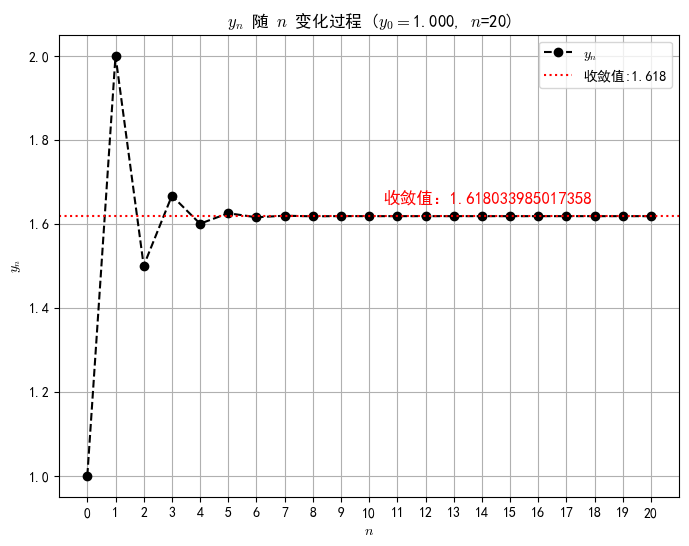

In [4]:
y0 = 1.0
n_arr = np.arange(21)
y_arr = fn(y0, 20)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(n_arr, y_arr, 'k--o', label="$y_n$")
ax.axhline(y_arr[-1], color='r', linestyle=':', label=f"收敛值:{y_arr[-1][0]:.3f}")
ax.set_xlabel("$n$")
ax.set_xticks(np.arange(21))
ax.set_ylabel("$y_n$")
ax.set_title(f"$y_n$ 随 $n$ 变化过程 ($y_0=${y0:.3f}, $n$=20)")
ax.text(10.5, 1.65, f"收敛值：{y_arr[-1][0]}", color='r', size=12)
ax.grid()
ax.legend()

### 初始值对结果的影响

上面我们验证了当 $y_0 = 1$ 时会收敛到 $\frac{1+\sqrt{5}}{2}$，一个非常自然的问题是当改变 $y_0$ 时即诶过是否会发生变化. 这里我们在 $[-5,5]$ 中随机采样 $10$ 次，统一迭代 $n=10$ 次，绘制不同初始值的收敛过程.

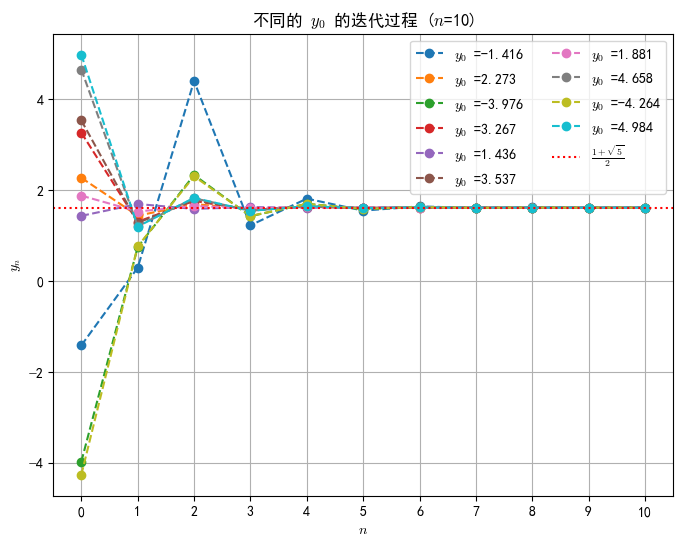

In [5]:
y0_arr = np.random.uniform(-5,5,10)
n_arr = np.arange(11)
yn_arr = fn(y0_arr, 10)
fig, ax = plt.subplots(figsize=(8,6))
for yn in yn_arr.T:
    ax.plot(n_arr, yn, '--o', label=f"$y_0$ ={yn[0]:.3f}")
ax.axhline((1+np.sqrt(5))/2, color='r', linestyle=':', label=r"$\frac{1+\sqrt{5}}{2}$")
ax.set_xlabel("$n$")
ax.set_xticks(np.arange(11))
ax.set_ylabel("$y_n$")
ax.set_title(f"不同的 $y_0$ 的迭代过程 ($n$=10)")
ax.grid()
ax.legend(ncol=2)

可以发现，随机选取一个初始值，得到的收敛值是相同的，均为 $\frac{1+\sqrt{5}}{2}$.

我们可以在更大的范围进行检验，这里我们定义一个新的函数 $f(y_0)$，其会迭代计算 $y_n$，当两次迭代相差小于某个给定的精度时，认为到该精度已经收敛. 同时也提高了效率（当数值基本稳定时就停止计算）.

具体而言，给定容差 $\epsilon$，当 $|y_n - y_{n-1}|<\epsilon$ 时，认为：

$$ y_n \approx \lim_{n\to\infty} y_n$$

In [6]:
def f_infty(y0, tol=1E-10, maxn=1E4):
    '''
    计算 y = 1/(1+y) 的极限值

    参数：
    y0: float 或 np.ndarray
        迭代的初始值，传入 np.ndarray 则批量计算
    tol: float
        容差（默认为 1E-10）
    maxn: float 或 int
        最大循环次数（默认为 1E4）

    返回：
    y: np.ndarray
        返回计算的结果
    '''
    y0 = np.array(y0, ndmin=1) # 确保至少是一维数组
    y = y0.copy()
    with np.errstate(divide='raise'): # 遇到除以 0 时抛出错误
        for i in range(int(maxn)):
            y_old = y.copy()
            try:
                y = 1 + 1/y
            except FloatingPointError as e: # 如果遇到除 0 错误，则加上一个小数避免问题
                y = 1 + 1/(y+1E14)
            if (np.all(np.abs(y-y_old)<tol)):
                return y
        print("达到最大循环次数仍未收敛.")
    return y

我们在 $[-1000,+1000]$ 中随机选取 $10000$ 个数带入函数 $f(y)$ 进行计算，并和 $\frac{1+\sqrt{5}}{2}$ 做差，差的绝对值的最大值为：

In [7]:
y0 = np.random.uniform(-1000,+1000,10000)
y_exact = (1+np.sqrt(5))/2
y = f_infty(y0, tol=1E-14)
np.max(np.abs(y-y_exact))

np.float64(1.3322676295501878e-15)

上述误差在我们设定的容差 $\epsilon < 10^{-15}$ 之内. 因此，即使 $y_0$ 在更大的范围内，$y_n$ 还是收敛于 $\frac{1+\sqrt{5}}{2}$（$n\to \infty$）

另外，由于我们求 $y_n$ 的极限的问题满足 $y=f(y)$，自然我们可以将求 $y_n$ 的极限值转换成函数 $f(y)$ 的不动点的问题. 同样第一次作业，我们可以绘制 $y_{n+1} = f(y_n)$ 以及 $y_{n+1} = y_n$ 的图像，其交点就为函数 $f(y)$ 的不动点.

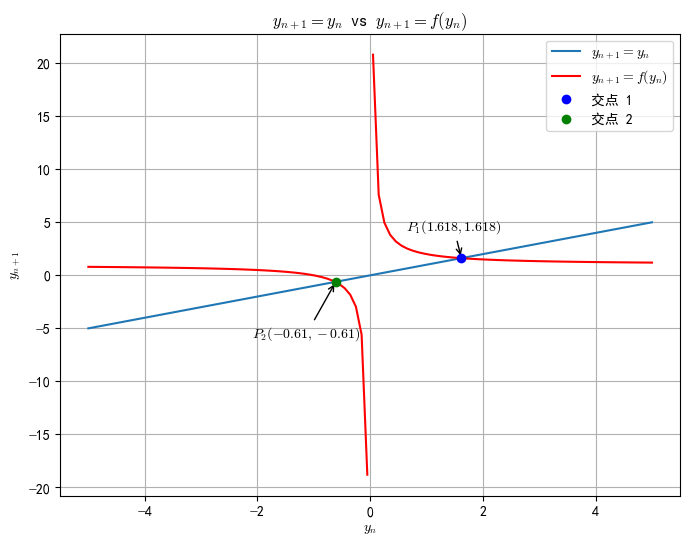

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(-5,5,100)
f = lambda x: 1 + 1/x
yp = (1+np.sqrt(5))/2
ax.plot(x, x, label="$y_{n+1} = y_{n}$")
# 0 处存在断点，不应该有连线，需要手动处理
ax.plot(x[x<0], f(x[x<0]), color="red", label="$y_{n+1} = f(y_n)$")
ax.plot(x[x>0], f(x[x>0]), color="red")
ax.grid()
ax.plot(yp, yp, 'bo', label=f'交点 1', zorder=5)
ax.annotate(f'$P_1 ({yp:.3f},{yp:.3f})$',
            xy=(yp, yp),
            xytext=(-40, 20),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax.plot(-0.61, -0.61, 'go', label=f'交点 2', zorder=5) # -0.61 是通过和 matplotlib 交互得到的大概值
ax.annotate('$P_2(-0.61,-0.61)$',
            xy=(-0.61, -0.61),
            xytext=(-60, -40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("$y_n$")
ax.set_ylabel("$y_{n+1}$")
ax.set_title("$y_{n+1}=y_n$ vs $y_{n+1}=f(y_n)$")
ax.legend()

> 注：这里点 $P_2$ 的坐标 $(-0.61,-0.61)$ 是通过和 matplotlib 交互得到的大概值.

上面绘图中我们发现 $y_{n+1}=y_n$ 与 $y_{n+1}=f(y_n)$ 存在两个交点，而并不是我们所预期的那样有且只有一个交点，因此需要在之后解决的问题是：

1. 另一个交点的坐标是什么？其解析的表达式是什么？
2. 为何我们前面迭代计算中即使是在大范围的 $y_0$ 内都只出现其中一个交点对应的坐标？为何另一个交点不出现？

由于在前文的所有数值计算中均只出现了 $P_1$ 这个点对应的座标值 $1.618$，因此再通过数值的方式可能难以得到另一个点，这里尝试进行解析计算分析.

## 解析计算

前文式(3) 中给出了数列的递推函数：

$$ y_{n+1} = f(y_n) = 1 + \frac{1}{y_n} \tag{4}$$

记 $y_n \to y$（$n\to\infty$），等式两段取极限：

$$ y = 1 + \frac{1}{y} \tag{5} $$

这里使用 `sympy` 进行解析求解：

In [9]:
sym.var("y")
sym.solve(1+1/y-y,y)

⎡1   √5  1   √5⎤
⎢─ - ──, ─ + ──⎥
⎣2   2   2   2 ⎦

可以发现，$y$ 一共有两个解：

$$y = \frac{1\pm\sqrt{5}}{2} \tag{6}$$

其中 $y = \frac{1+\sqrt{5}}{2}$ 是前文我们经过迭代数值计算得到的值（也是我们所期望的值），而 $y=\frac{1-\sqrt{5}}{2}$ 是计算出现的增根. 其约等于：

$$ \frac{1-\sqrt{5}}{2} \approx  -0.618033988749895\dots$$

其就是我们在绘制 $y_{n+1} = f(y_n)$ 和 $y_{n+1}=y_n$ 图像时出现的另一个交点的坐标.

## 为何只有 $\frac{1+\sqrt{5}}{2}$？

前文我们分别从数值角度和解析角度分析了连分式：

$$ y = 1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{\cdots}}}}} $$

的值，从数值的角度，我们只发现了 $\frac{1+\sqrt{5}}{2}$ 这一个值，从解析角度，我们却得到了 $\frac{1\pm\sqrt{5}}{2}$ 这两个值. 需要回答的是为何我们只取了 $\frac{1+\sqrt{5}}{2}$ 这一个值，这两个值有什么性质上的不同？

对于这种迭代到不动点问题，类似作业 1，我们可以绘制出“**蛛网图**”，具体而言：

1. 绘制 $y_{n+1} = f(y_n)$ 和 $y_{n+1}=y_n$ 的图像
2. 对于给定的初始值 $y_0$，$(y_0,y_0)$ 作为起始点
3. 做垂线交 $f(y_n)$ 于新的一点，这一步表示 $y_{n+1}$ 设为 $g(y_n)$
4. 在第三步交点做水平线交 $y$ 与新的一点，这一步表示旧的 $y_{n+1}$ 将作为新的 $g(y)$ 的自变量
5. 重复三、四步，直至达到指定的次数 $n$ 或者到达交点附近邻域

这里我们使用动态绘图的方式来绘制蛛网图.

> 注：动态绘图由于使用了 `widget` 来嵌入 Jupyter Notebook 而不是像其他静态图作为图片嵌入，因此需要运行单元格才能显示）

interactive(children=(FloatSlider(value=1.0, description='y0', max=10.0, min=-10.0, step=0.01), IntSlider(valu…

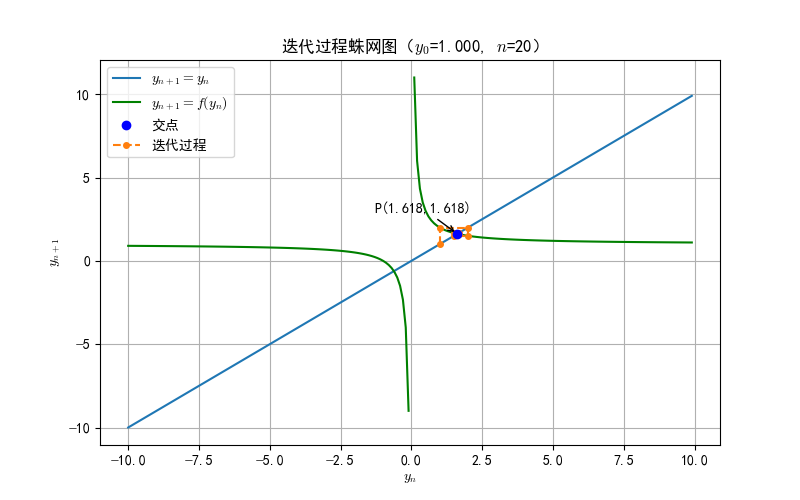

In [36]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(8, 5))

@ipw.interact(
    y0=(-10.0, 10.0, 0.01),
    n=(1, 40, 1)
)
def update_plot(y0=1, n=20):
    if (np.abs(y0)<1E-14):
        print("y0 不能为 0")
    n = int(n)
    ax.clear()
    g = lambda x: 1+1/x
    x_arr = np.arange(-10, 10, 0.1)
    n_arr = np.arange(n+1)
    yn_arr = fn(y0, n).flatten()
    path = np.zeros((2*n+1, 2))
    for i, (p0, p1) in enumerate(zip(yn_arr, yn_arr[1:])):
        path[2*i] = np.array([p0, p0]).flatten()
        path[2*i+1] = np.array([p0, p1]).flatten()
    path[-1] = np.array([yn_arr[-1], yn_arr[-1]]).flatten()
    ax.plot(x_arr, x_arr, label="$y_{n+1}=y_n$")
    # 防止除零问题
    ax.plot(x_arr[x_arr<-1E-4], g(x_arr[x_arr<-1E-4]), color="green", label="$y_{n+1}=f(y_n)$")
    ax.plot(x_arr[x_arr>1E-4], g(x_arr[x_arr>1E-4]), color="green")
    ax.plot(y_arr[-1], y_arr[-1], 'bo', label=f'交点', zorder=5)
    ax.annotate(f'P({yp:.3f},{yp:.3f})',
                xy=(y_arr[-1], y_arr[-1]),
                xytext=(-60, 15),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"))
    ax.grid()
    ax.plot(path[:,0], path[:,1], '--o', markersize=4, label="迭代过程")
    ax.set_xlabel("$y_n$")
    ax.set_ylabel("$y_{n+1}$")
    ax.legend()
    ax.set_title(f"迭代过程蛛网图（$y_0$={y0:.3f}, $n$={n}）")
    

在任意改变 $y_0$ 我们发现，无论 $y_0$ 为多少，其总只会收敛到 $\left( \frac{1+\sqrt{5}}{2},  \frac{1+\sqrt{5}}{2} \right)$ 这一个点. 这里即使我们令 $y_0$ 取一个非常接近 $\frac{1-\sqrt{5}}{2}$ 的值，其“蛛网图”如下：

Text(0.5, 1.0, '迭代过程蛛网图（$y_0$=-0.61793, $n$=20）')

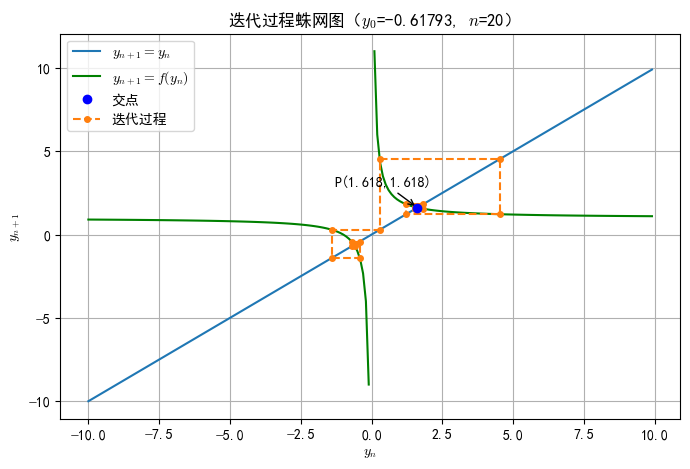

In [35]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 5))

n = 20
y0 = (1-np.sqrt(5)) / 2 + 1E-4
ax.clear()
g = lambda x: 1+1/x
x_arr = np.arange(-10, 10, 0.1)
n_arr = np.arange(n+1)
yn_arr = fn(y0, n).flatten()
path = np.zeros((2*n+1, 2))
for i, (p0, p1) in enumerate(zip(yn_arr, yn_arr[1:])):
    path[2*i] = np.array([p0, p0]).flatten()
    path[2*i+1] = np.array([p0, p1]).flatten()
path[-1] = np.array([yn_arr[-1], yn_arr[-1]]).flatten()
ax.plot(x_arr, x_arr, label="$y_{n+1}=y_n$")
# 防止除零问题
ax.plot(x_arr[x_arr<-1E-4], g(x_arr[x_arr<-1E-4]), color="green", label="$y_{n+1}=f(y_n)$")
ax.plot(x_arr[x_arr>1E-4], g(x_arr[x_arr>1E-4]), color="green")
ax.plot(y_arr[-1], y_arr[-1], 'bo', label=f'交点', zorder=5)
ax.annotate(f'P({yp:.3f},{yp:.3f})',
            xy=(y_arr[-1], y_arr[-1]),
            xytext=(-60, 15),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax.grid()
ax.plot(path[:,0], path[:,1], '--o', markersize=4, label="迭代过程")
ax.set_xlabel("$y_n$")
ax.set_ylabel("$y_{n+1}$")
ax.legend()
ax.set_title(f"迭代过程蛛网图（$y_0$={y0:.5f}, $n$={n}）")
    

这里我们可以观察到，在 $\left( \frac{1-\sqrt{5}}{2}, \frac{1-\sqrt{5}}{2} \right)$ 小邻域的迭代过程，每一步都远离 $\left( \frac{1-\sqrt{5}}{2}, \frac{1-\sqrt{5}}{2} \right)$，在 $\left( \frac{1+\sqrt{5}}{2}, \frac{1+\sqrt{5}}{2} \right)$ 小邻域的迭代过程每一步都更靠近 $\left( \frac{1+\sqrt{5}}{2}, \frac{1+\sqrt{5}}{2} \right)$. 下面我们尝试使用解析的方式进一步计算上面的猜想.

对于某个不动点 $P(y_p,y_p)$ 附近邻域，设某一步的 $y_n$ 为（其中 $\epsilon$ 为一个小量）：

$$ y_n = y_p + \epsilon $$

上述 $y_n$ 经过递推关系 $f(y)$ 得到：

$$ y_{n+1} = f(y_n) = f(y_p + \epsilon) \tag{7} $$

我们将 $f(y)$ 在 $y_p$ 附近进行 Taylor 展开（只到第一阶）：

$$ f(y) = f(y_p) + f'(y_p) (y-y_p) + \dots \tag{8}$$

式(8)带入式(7)，得：

$$ y_{n+1} = f(y_p) + f'(y_p) \epsilon $$

即：

$$ y_{n+1} - y_p = f'(y_p) \epsilon $$

不难得到，若 $|f'(y_p)| < 1$，则每次收敛都更靠近 $y_p$，若 $|f'(y_p)| > 1$，则每次收敛都更远离 $y_p$.

现在我们使用 `sympy` 计算 $f(y)$ 的导数：

In [46]:
sym.var("y")
f = lambda y: 1 + 1/y
sym.diff(f(y), y)

-1 
───
 2 
y  

在 $\frac{1+\sqrt{5}}{2}$ 和 $\frac{1-\sqrt{5}}{2}$ 的 $f(y)$ 的导数值为：

In [48]:
sym.diff(f(y), y)

-1 
───
 2 
y  

## 结论

## 参考资料

- "问题背景"中有关“黄金分割数”的历史使用 Google Gemini AI 生成，同时参考 Wikiedia 中“黄金比例”条目对回答进行检查和修改(<https://zh.wikipedia.org/wiki/%E9%BB%84%E9%87%91%E5%88%86%E5%89%B2%E7%8E%87>)

## 致谢

## 附一：问题

- 在绘图中我发现 matplotlib 默认的公式绘图没有 LaTeX 公式那么好看，因此我询问了 Gemini AI，从而知道通过 `plt.rcParams['mathtext.fontset'] = 'cm'` 设置数学环境的字体即可得到类似 LaTeX 渲染的公式（LaTeX 默认使用 `cm` 字体作为数学公式字体）.

## 附二：学习心得